In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import fbprophet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
import plotly.figure_factory as ff

In [3]:
data_m = pd.read_csv('xab.csv')
data_m.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,9c620428487cada88130ab08e2ed063c4824852d,9/12/19 12:45,9/12/19 12:45,24,0.0,1.703184e+10,1.703184e+10,28.0,28.0,10.0,...,0.00,10.00,True,1,41.870415,-87.675086,POINT (-87.6750856208 41.8704150003),41.870415,-87.675086,POINT (-87.6750856208 41.8704150003)
1,9c62bd8cad97bd27430e2e3ffc07628a7fa00d5d,8/18/19 19:00,8/18/19 19:00,242,0.0,1.703108e+10,1.703108e+10,8.0,8.0,2.5,...,2.55,5.05,False,1,41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935)
2,9c62fa73e82e32a54c9f2aca47e11f370b9bb80c,7/8/19 17:15,7/8/19 17:15,6,0.0,NaN,NaN,16.0,16.0,15.0,...,0.00,17.00,True,1,41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253)
3,9c69c7bba2eb3f2846988fed0916b1dc245b0b14,9/27/19 6:30,9/27/19 6:30,10,0.0,NaN,NaN,2.0,2.0,2.5,...,2.55,5.05,False,1,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),42.001571,-87.695013,POINT (-87.6950125892 42.001571027)
4,9c7214acfd1aded46abeebe484939233d618c02a,9/28/19 22:45,9/28/19 22:45,21,0.0,1.703107e+10,1.703107e+10,7.0,7.0,2.5,...,2.55,5.05,False,1,41.929078,-87.646293,POINT (-87.6462934762 41.9290776551),41.929078,-87.646293,POINT (-87.6462934762 41.9290776551)


In [4]:
x_train, x_val, y_train, y_val = train_test_split(data_m[["Trip Seconds","Trip Miles","Additional Charges"]],data_m["Trip Total"],train_size = 0.75, test_size = 0.25, random_state = 0)

In [5]:
scaler = StandardScaler()
x_train.fillna(x_train.mean(), inplace=True)
x_val.fillna(x_val.mean(), inplace=True)
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_val)

In [6]:
#Checking first for a model with 1 predictors.
pred_variable = ['Trip Seconds']
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[0]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[0]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[0]], y = y_val) # R squared (Validation)

print([score_train, score_val])

[0.6303826877883139, 0.6381225798264011]


In [7]:
pred_variable = ['Trip Miles']
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[1]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[1]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[1]], y = y_val) # R squared (Validation)

print([score_train, score_val])

[0.7916314507204991, 0.7801969515610844]


In [8]:
pred_variable = ['Additional Charges']
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[1]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[2]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[2]], y = y_val) # R squared (Validation)

print([score_train, score_val])

[0.31914014106186406, 0.3273109788597357]


In [9]:
pred_variable = ['Trip Seconds', 'Trip Miles']
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[0,1]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[0,1]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[0,1]], y = y_val) # R squared (Validation)

print([score_train, score_val])

[0.8052335202761105, 0.7963859365267957]


In [10]:
pred_variable = ['Trip Seconds', 'Additional Charges']
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[0,2]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[0,2]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[0,2]], y = y_val) # R squared (Validation)

print([score_train, score_val])

[0.762346024707321, 0.7643372401543252]


In [11]:
pred_variable = ['Trip Miles', 'Additional Charges']
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[1,2]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[1,2]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[1,2]], y = y_val) # R squared (Validation)

print([score_train, score_val])

[0.8388472989736899, 0.8309795982200868]


In [12]:
model = linear_model.LinearRegression().fit(X = x_train_scaled, y = y_train)

score_train = model.score(X = x_train_scaled, y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled, y = y_val) # R squared (validation)
print([score_train, score_val])

[0.8568569676498858, 0.8507027156783711]


In [13]:
data_m['Trip Start Time']=pd.to_datetime(data_m['Trip Start Timestamp'])
data_m['Trip End Time']=pd.to_datetime(data_m['Trip End Timestamp'])
data = data_m.loc[:,['Fare']]
data = data.set_index(data_m['Trip Start Time'])
data['Fare'] = pd.to_numeric(data['Fare'], downcast = 'float', errors = 'coerce')
data.head()

,Fare
Trip Start Time,
2019-09-12 12:45:00,10.0
2019-08-18 19:00:00,2.5
2019-07-08 17:15:00,15.0
2019-09-27 06:30:00,2.5
2019-09-28 22:45:00,2.5


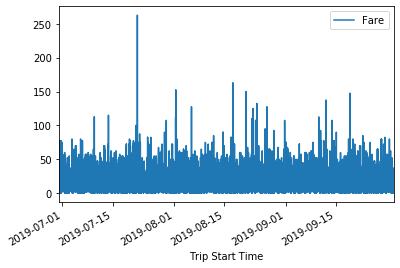

In [14]:
data.plot()

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


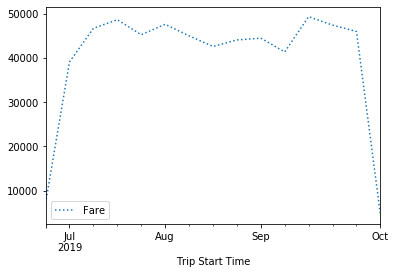

In [15]:
weekly = data.resample('W').sum()
pd.plotting.register_matplotlib_converters()
weekly.plot(style = [':','--','-'])

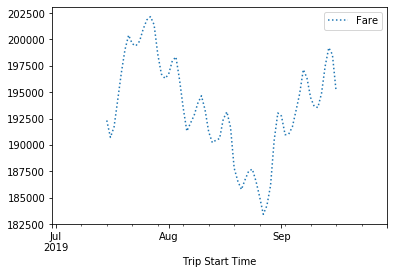

In [16]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style = [':','--','-'])

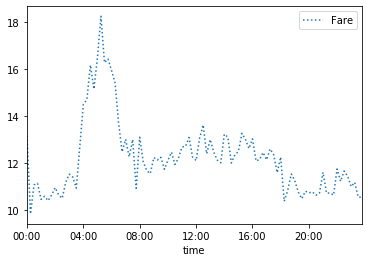

In [17]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style = [':','--','-'])

In [18]:
df = data_m.loc[:,['Trip Start Time', 'Fare']]
df['Fare'] = pd.to_numeric(df['Fare'], errors = 'coerce')
df = df.groupby(['Trip Start Time']).sum().reset_index()
df.head()

,Trip Start Time,Fare
0,2019-06-30 00:00:00,25.0
1,2019-06-30 00:15:00,102.5
2,2019-06-30 00:30:00,112.5
3,2019-06-30 00:45:00,35.0
4,2019-06-30 01:00:00,167.5


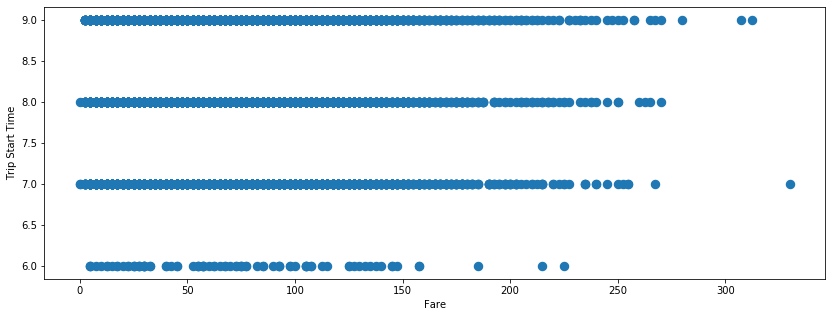

In [19]:
mon = data_m['Trip Start Time']
temp = pd.DatetimeIndex(mon)
month = pd.Series(temp.month)
to_be_plotted = df.drop(['Trip Start Time'], axis = 1)
to_be_plotted = to_be_plotted.join(month)
to_be_plotted.plot.scatter(x = 'Fare', y = 'Trip Start Time', figsize = (14,5), linewidth = 5, fontsize = 10)
plt.show()

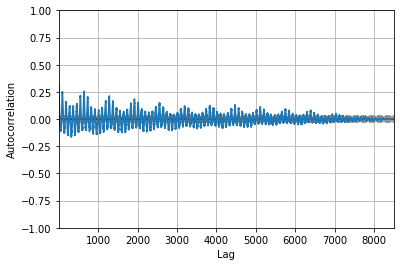

In [20]:
pd.plotting.autocorrelation_plot(df['Fare'])
plt.show()

In [21]:
df2 = data_m
df2.reset_index(inplace=True)
df2 = df2.rename(columns={'Trip Start Timestamp':'ds','Trip Total':'y'})
df2.head()

,index,Trip ID,ds,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start Time,Trip End Time
0,0,9c620428487cada88130ab08e2ed063c4824852d,9/12/19 12:45,9/12/19 12:45,24,0.0,1.703184e+10,1.703184e+10,28.0,28.0,...,True,1,41.870415,-87.675086,POINT (-87.6750856208 41.8704150003),41.870415,-87.675086,POINT (-87.6750856208 41.8704150003),2019-09-12 12:45:00,2019-09-12 12:45:00
1,1,9c62bd8cad97bd27430e2e3ffc07628a7fa00d5d,8/18/19 19:00,8/18/19 19:00,242,0.0,1.703108e+10,1.703108e+10,8.0,8.0,...,False,1,41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),2019-08-18 19:00:00,2019-08-18 19:00:00
2,2,9c62fa73e82e32a54c9f2aca47e11f370b9bb80c,7/8/19 17:15,7/8/19 17:15,6,0.0,NaN,NaN,16.0,16.0,...,True,1,41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),2019-07-08 17:15:00,2019-07-08 17:15:00
3,3,9c69c7bba2eb3f2846988fed0916b1dc245b0b14,9/27/19 6:30,9/27/19 6:30,10,0.0,NaN,NaN,2.0,2.0,...,False,1,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),42.001571,-87.695013,POINT (-87.6950125892 42.001571027),2019-09-27 06:30:00,2019-09-27 06:30:00
4,4,9c7214acfd1aded46abeebe484939233d618c02a,9/28/19 22:45,9/28/19 22:45,21,0.0,1.703107e+10,1.703107e+10,7.0,7.0,...,False,1,41.929078,-87.646293,POINT (-87.6462934762 41.9290776551),41.929078,-87.646293,POINT (-87.6462934762 41.9290776551),2019-09-28 22:45:00,2019-09-28 22:45:00


In [22]:
df2_prophet = fbprophet.Prophet(changepoint_prior_scale=0.10)
df2_prophet.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [23]:
df2_forecast = df2_prophet.make_future_dataframe(periods= 30*3, freq = 'H')
df2_forecast = df2_prophet.predict(df2_forecast)

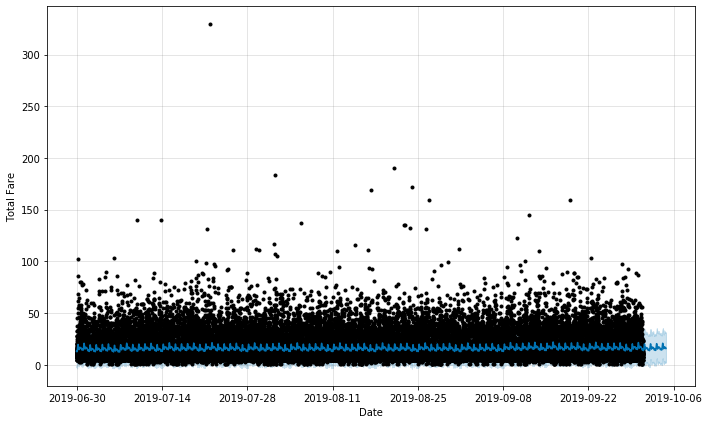

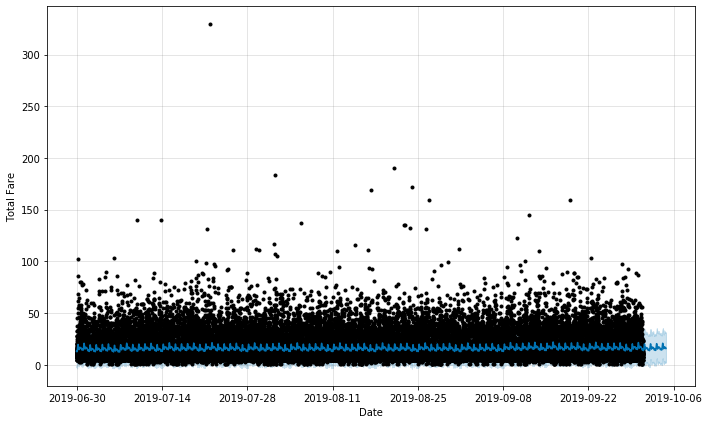

In [24]:
df2_prophet.plot(df2_forecast, xlabel = 'Date', ylabel = 'Total Fare') 

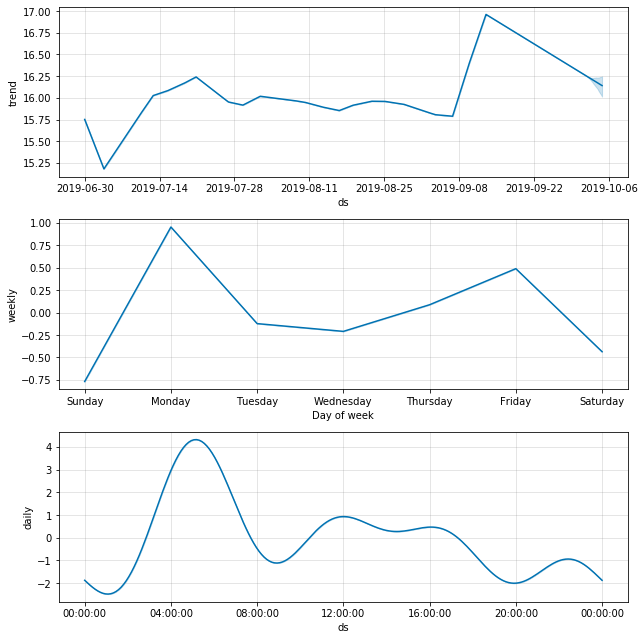

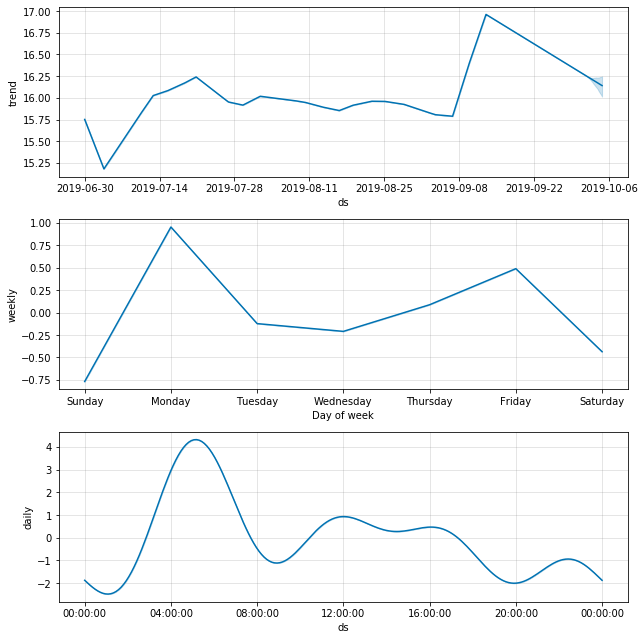

In [25]:
df2_prophet.plot_components(df2_forecast)

[0.21679215799007667, 0.556602484739871]


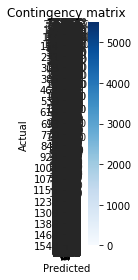

In [31]:
# K-Means with 5 clusters, 10 iterations
# "Trip Seconds","Trip Miles","Additional Charges"
# Variables used: 'Trip Seconds'[0] , 'Trip Miles'[1], 'Additional Charges'[2] 

# pick certain variables from x_train_scaled
X = []
for i in x_train_scaled:
    X.append([i[1]])


# cluster observations
clustering = KMeans(n_clusters = 10, init='random', max_iter = 25, random_state=0).fit(X, y_train)
clusters = clustering.labels_

# build and display contingency matrix
cont_matrix = metrics.cluster.contingency_matrix(y_train, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# determine adjusted rand index and silhouette coefficient
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters)
print([adjusted_rand_index, silhouette_coefficient])